# LeDebruiteur
* Jonas Freiburghaus
* Romain Capocasale
* He-Arc, INF3dlm-a
* Image Processing course
* 2019-2020

## Filters

This notebook contains the different methods of noise reduction used as standard in the field of image processing

In [1]:
import os

from debruiteur.plots.plots import plot_result_comparaison_standart_method_for_each_noise_type,plot_result_comparaison_standart_method_for_each_blur_type
from debruiteur.preprocessing.preprocessor import make_original_dataframe, make_resized_dataframe, make_noised_dataframe
from debruiteur.noise.noise import GaussianNoise, PoissonNoise, UniformNoise, SaltPepperNoise, SquareMaskNoise, SpeckleNoise
from debruiteur.utils.utils import load_model, split_train_val_df
from debruiteur.noise.filters import gaussian_filter, wiener_filter, laplacian_filter, gaussian_weighted_substract_filter, mean_filter, median_filter, conservative_filter, low_pass_filter, gaussian_blur, averaging_blur, median_blur

### Load data

In [2]:
working_dir = os.path.abspath(os.getcwd())

df_original = make_original_dataframe(os.path.join(working_dir, "images"))
df_resized = make_resized_dataframe(df_original, img_shape=(100, 100), resized_path=os.path.join(working_dir, "resized_images"))

## Sharpness and edge filter
### Blur list

In [3]:
blur_list = [
    gaussian_blur,
    median_blur,
    averaging_blur
]

#### Wiener filter

This filter is used to estimate the desired value of a noisy signal. The Wiener filter minimizes the root mean square error between the estimated random process and the desired process.

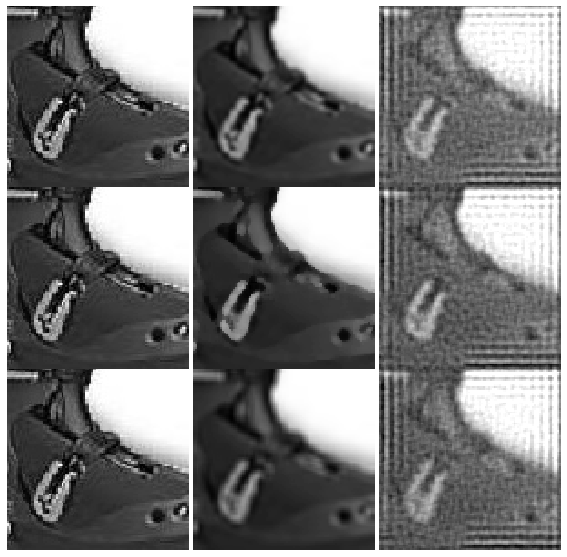

In [4]:
plot_result_comparaison_standart_method_for_each_blur_type(wiener_filter, df_resized.iloc[0]['path'], blur_list)

#### Laplacian filter

This filter calculates the Laplace transform on an image and adds it to the original image. Gaussian noise can be added to the image to improve the result. 

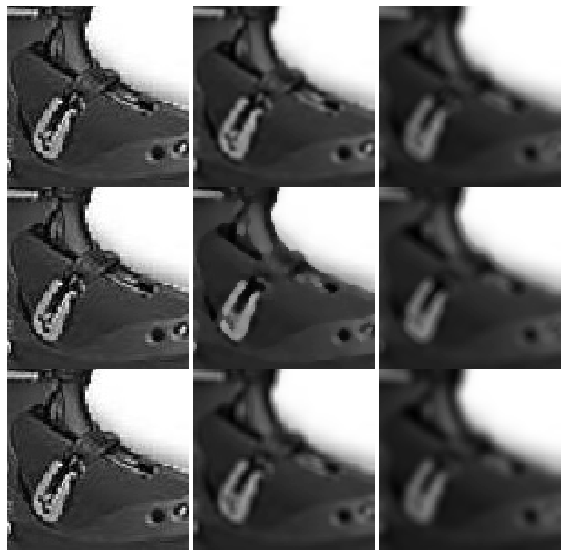

In [5]:
plot_result_comparaison_standart_method_for_each_blur_type(laplacian_filter, df_resized.iloc[0]['path'], blur_list)

#### Gaussian weighted substract filter

This filter calculates a Gaussian blur on the image and adds it with certain weightings configurable with the parameters of the function.

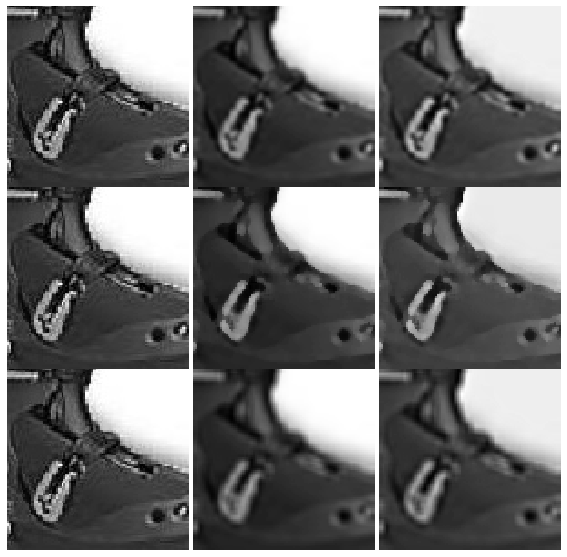

In [6]:
plot_result_comparaison_standart_method_for_each_blur_type(gaussian_weighted_substract_filter, df_resized.iloc[0]['path'], blur_list)

## Denoising filters
### Noise type

In [7]:
noise_class_list = [
    GaussianNoise(mean=0, std=20),
    PoissonNoise(),
    UniformNoise(amplitude=100),
    SaltPepperNoise(),
    SquareMaskNoise(mask_shape=(10, 10), freq=0.1),
    SpeckleNoise(),
]

#### Mean filter

The averaging filter replaces each pixel with the value average of its neighbours according to a given kernel. 

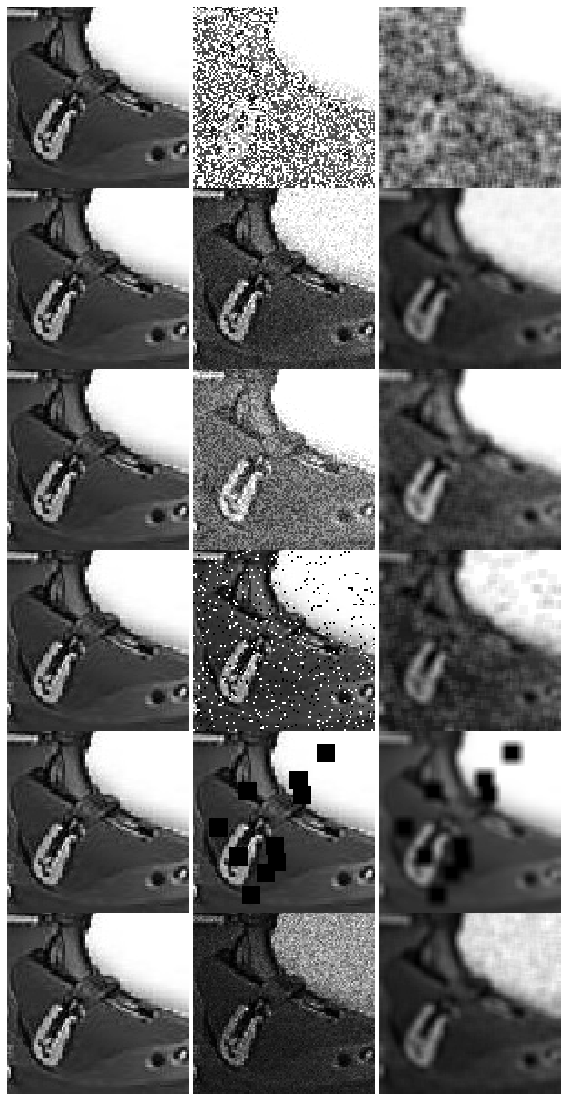

In [8]:
plot_result_comparaison_standart_method_for_each_noise_type(mean_filter, df_resized.iloc[0]['path'], noise_class_list)

#### Median filter

The median filter replaces each pixel with the median value of its neighbors according to a given kernel. 

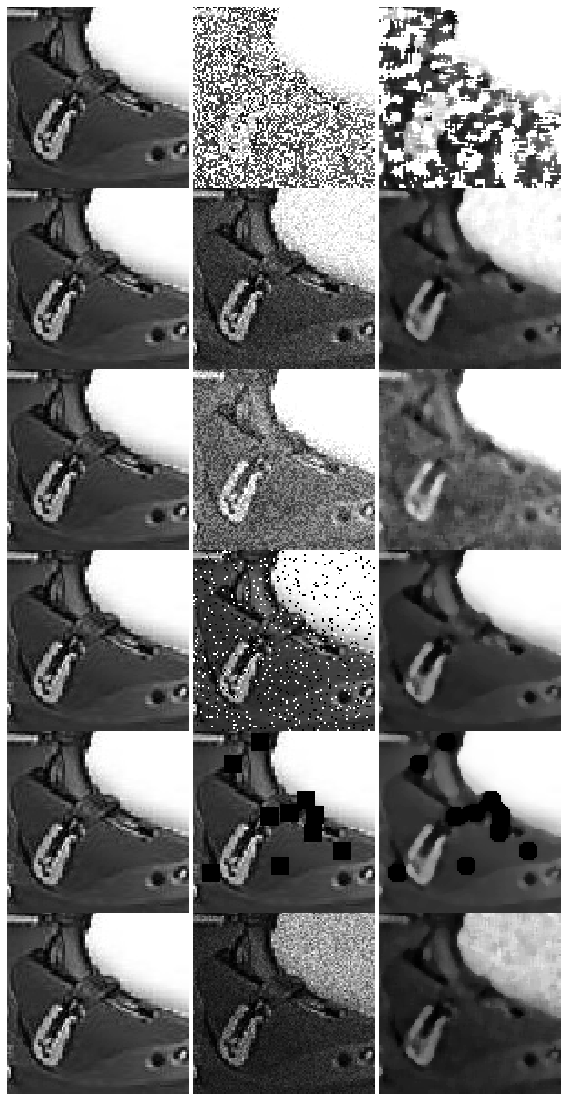

In [9]:
plot_result_comparaison_standart_method_for_each_noise_type(median_filter, df_resized.iloc[0]['path'], noise_class_list)

#### Gaussian filter

The gaussian filter is used to reduce noise by convolving a gaussian kernel.  
It is particularly good with gaussian noise.

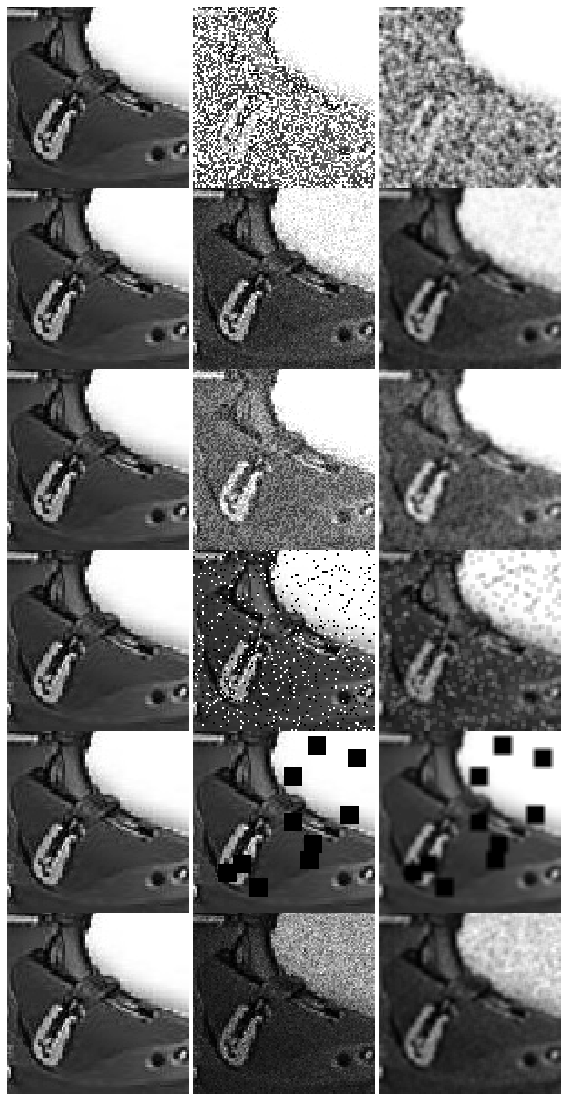

In [10]:
plot_result_comparaison_standart_method_for_each_noise_type(gaussian_filter, df_resized.iloc[0]['path'], noise_class_list)

#### Conservative filter

The conservative filter for a given kernel retains the current pixel if it is between the min and max of neighboring pixels. If the value of the pixel is below the min of the neighboring pixels have taken the min. If the value is above the neighbouring max pixel, the max is taken.

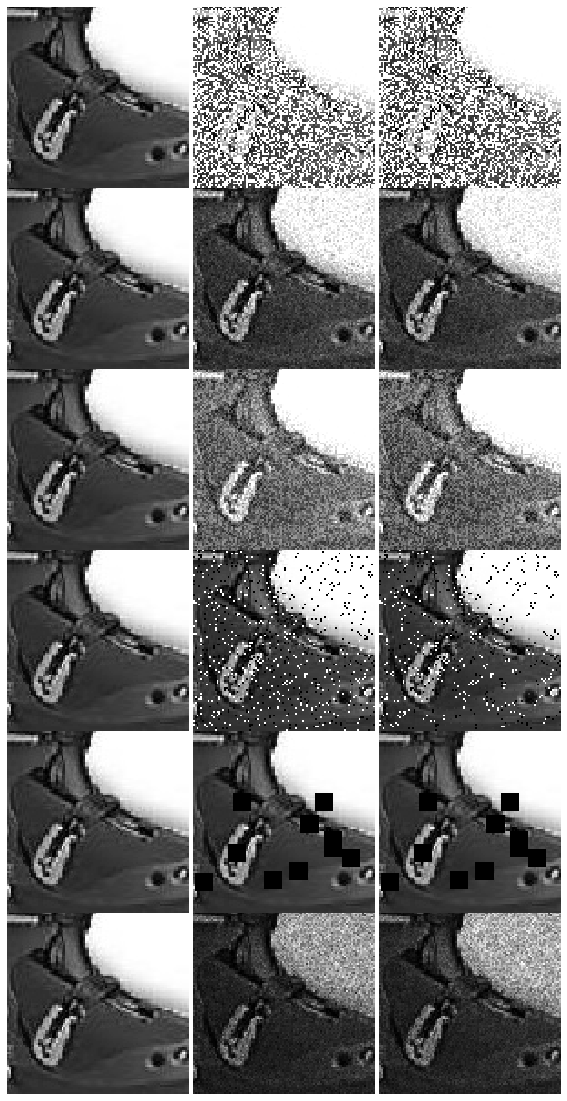

In [11]:
plot_result_comparaison_standart_method_for_each_noise_type(conservative_filter, df_resized.iloc[0]['path'], noise_class_list)

#### Low pass filter (used with FFT)

This filter performs a Fourier transform on the image. Afterwards, a mask is applied on the image that has undergone the Fourier transform and the image is retransformed with an inverse Fourier transform. This filter can be used as a noise reducer when used as a low pass filter and as an image sharpner or edge enhancer when used as high pass filter.

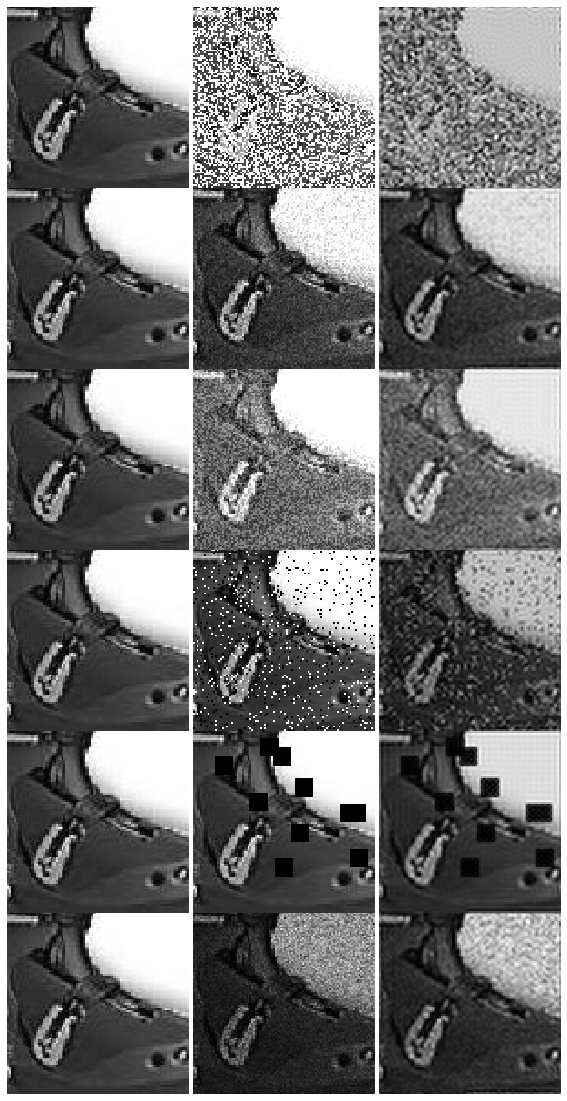

In [12]:
plot_result_comparaison_standart_method_for_each_noise_type(low_pass_filter, df_resized.iloc[0]['path'], noise_class_list)

## Sources
* https://fr.wikipedia.org/wiki/Filtre_de_Wiener